# Подключение

In [ ]:
# Монтирует google disk в colab
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

url = os.chdir(r"/content/gdrive/MyDrive/ЦК программа ML/Разбор контеста по Pandas")
os.getcwd()

'/content/gdrive/MyDrive/ЦК программа ML/Разбор контеста по Pandas'

In [ ]:
os.listdir()

['Задача B',
 'Задача D',
 'Задача C',
 'Задача G',
 'Задача F',
 'Задача I',
 'Задача E',
 'Задача H',
 'Задача A']

Вы должны понимать, что в контесте:
1. В каждом задаче несколько датасетов, на которых проверяется ваше решение. Все примеры и ответы к ним выложены:

https://drive.google.com/drive/folders/1IaEDGh3cfuafa5aBVBkbeZMEo1JfNexV?usp=sharing

2. В Яндекс.Контесте все входные файлы независимо от задачи и независимо от номера теста называются `input.csv`. Система сама автоматически проверяет на каждом файте отдельно ваше решение.

3. Названия файлов к каждой задаче всегда указаны в контесте (собственно как и то как выводить ответ):
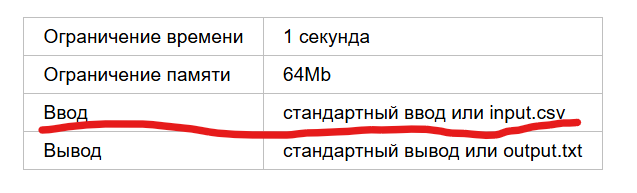

In [ ]:
# Например в первой задаче 4 теста, т.е. 4 файла, на которых проверяется ваше решение
os.listdir('Задача A/')

['01.csv', '01.a', '02.csv', '02.a', '03..csv', '03.a', '04.csv', '04.a']

# A. Все о размерностях

In [ ]:
import pandas as pd

df = pd.read_csv('Задача A/01.csv')
df

,38,28,14
0,42,7,20
1,38,18,22
2,10,10,23
3,35,39,23


В описании задачи можно явно увидить, что у таблиц нет заголовков, т.е. названия столбцов отсутствуют:

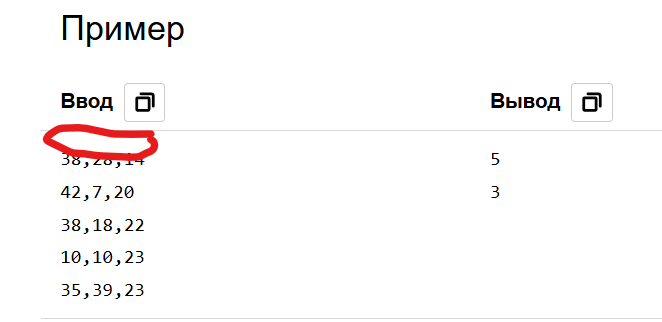

Поэтому, чтобы правильно считать данные нужно функции `pd.read_csv()` явным образом указать отсутствия названия заголовоков через параметр `header`.

In [ ]:
import pandas as pd

df = pd.read_csv('Задача A/01.csv', header=None)
df

,0,1,2
0,38,28,14
1,42,7,20
2,38,18,22
3,10,10,23
4,35,39,23


In [ ]:
# как узнать размерность входного DataFrame (а мы помним что DataFrame - это по сути просто таблица)
df.shape

(5, 3)

In [ ]:
# нам вернулся котеж из двух значений (n, m)
# n - количество строк
# m - количество столбоцов

df.shape[0]

5

# B. Самое частое имя

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Задача B/01.csv')

df

,Имя,Возраст,Балл
0,Вячеслав,25,10
1,Алексей,6,21
2,Владислав,9,23
3,Никита,14,8
4,Кирилл,16,48
5,Олег,44,19
6,Андрей,5,12
7,Вячеслав,49,2
8,Виктор,28,8


In [ ]:
type(df['Имя'].value_counts()) # value_counts() всегда! возвращает серию, а это значит по умочанию у нее нет названия столбцов!

pandas.core.series.Series

In [ ]:
df['Имя'].value_counts()

,count
Имя,
Вячеслав,2
Алексей,1
Владислав,1
Никита,1
Кирилл,1
Олег,1
Андрей,1
Виктор,1


In [ ]:
df['Имя'].value_counts().reset_index()

,Имя,count
0,Вячеслав,2
1,Алексей,1
2,Владислав,1
3,Никита,1
4,Кирилл,1
5,Олег,1
6,Андрей,1
7,Виктор,1


**Внимательность наше всё!**

Так как версий 3-го Python много, и каждая версия носит какие-то изменения в себе, то надо быть внимательным. В любом контесте всегда указана версия Python, которая используется при проверке решений:

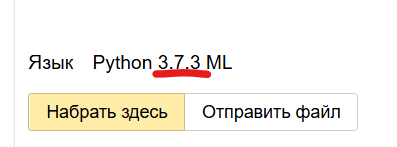

**Как узнать какая версия стоит у вас?**

In [ ]:
# надо в консоле ввести
# у меня в colabe используется например вот эта версия:

!python --version

Python 3.10.12


Например, выполнение такой же команды, но на другой версии Python, вернет нам:

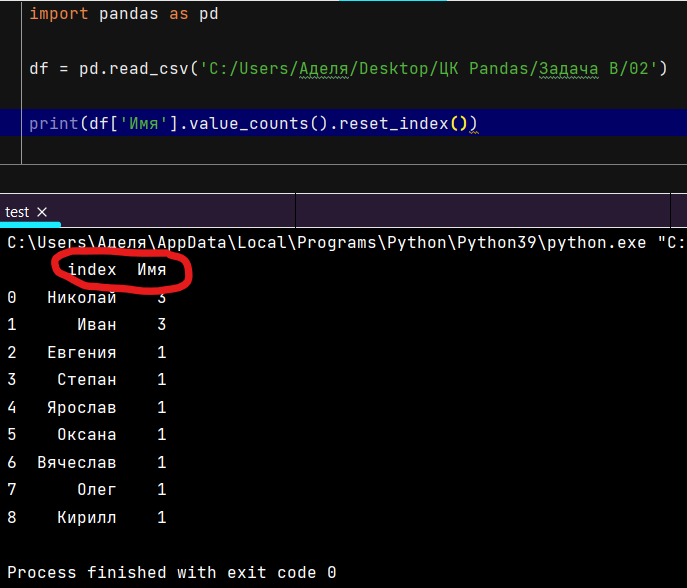

Видим, что в зависимости от версии Python, сброс индексов после функции `value_counts()` возвращает названия столбцов **по-другому**.

In [ ]:
df = pd.read_csv('Задача B/02.csv')
df

,Имя,Возраст,Балл
0,Николай,9,32
1,Евгения,5,25
2,Степан,40,13
3,Иван,23,2
4,Иван,5,29
5,Ярослав,5,26
6,Оксана,10,45
7,Иван,49,36
8,Вячеслав,24,10
9,Олег,33,39


In [ ]:
# сохраним результат выполнения в переменную tmp
tmp = df['Имя'].value_counts().reset_index()

# Решить это можно ЯВНЫМ образом переименовав столбцы
tmp.columns = ['Имя', 'count']

# Найдем наиболее встречающееся имя
res = tmp[tmp['count'] == tmp['count'].max()]

# Отсортируем теперь по столбцу имя в алфавитном порядке
# После того как нашли максимум
res = res.sort_values(['Имя'])

# # выведем результат
for i in res.values:
    print(*i)

Иван 3
Николай 3


In [ ]:
res

,Имя,count
1,Иван,3
0,Николай,3


In [ ]:
res.values # возвращает строки в виде numpy массива

array([['Иван', 3],
       ['Николай', 3]], dtype=object)

In [ ]:
# что такое *?

l = [[1, 2, 4, "Helllo"]]

print(*l)

[1, 2, 4, 'Helllo']


`res = tmp[tmp['count'] == tmp['count'].max()].values` - давайте подробнее обсудим почему именно так надо делать.

In [ ]:
df = pd.read_csv('Задача B/03.csv')

tmp = df['Имя'].value_counts().reset_index()
tmp.head()

,Имя,count
0,Арсений,2
1,Никита,2
2,Павел,1
3,Ксения,1
4,Надежда,1


**Все кто решал через поиск элементов, которые не равны 1, или выводили просто первую строку после сортировки, получали не верный ответ, потому что:**

In [ ]:
# если берем только первую строку, то получаем
# а правильный ответ и Арсений и Никита
tmp.loc[0,:]

,0
Имя,Арсений
count,2


In [ ]:
# если берем всё что не равно 1

df = pd.read_csv('Задача B/04.csv')

tmp = df['Имя'].value_counts().reset_index()
tmp.head()

,Имя,count
0,Анастасия,3
1,Ярослав,2
2,Елена,2
3,Артем,2
4,Наталья,1


In [ ]:
# если берем всё что не равно 1
# что тоже неверно
# так как ответ только Анастасия
tmp[tmp['count'] != 1]

,Имя,count
0,Анастасия,3
1,Ярослав,2
2,Елена,2
3,Артем,2


# C. Различные имена

In [ ]:
# различные имена

import pandas as pd
import numpy as np

df = pd.read_csv('Задача C/01.csv')
df

,Имя,Возраст,Балл
0,Вячеслав,25,10
1,Алексей,6,21
2,Владислав,9,23
3,Никита,14,8
4,Кирилл,16,48
5,Олег,44,19
6,Андрей,5,12
7,Вячеслав,49,2
8,Виктор,28,8


In [ ]:
# Метод unique() возвращает список всех различных элементов в нужном столбце
# но вовзращает в том порядке, в котором встретил! А по задаче надо вывести в алфавитном
df['Имя'].unique()

array(['Вячеслав', 'Алексей', 'Владислав', 'Никита', 'Кирилл', 'Олег',
       'Андрей', 'Виктор'], dtype=object)

In [ ]:
unique_names = df['Имя'].unique()
print(*np.sort(unique_names))

Алексей Андрей Виктор Владислав Вячеслав Кирилл Никита Олег


# D. Пропуски

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Задача D/01.csv')

df

,Имя,Возраст,Балл
0,NaN,3.0,29
1,Максим,47.0,20
2,Мария,13.0,27
3,Михаил,NaN,49
4,NaN,46.0,26
5,Владимир,19.0,29
6,Павел,41.0,38
7,NaN,NaN,24
8,NaN,9.0,20


In [ ]:
# Эта операция возвращает всегда серию!!
result = df.isna().sum()
print(type(result))
result

<class 'pandas.core.series.Series'>


,0
Имя,4
Возраст,2
Балл,0


In [ ]:
result.reset_index() # сброс индексов приводит в формированию датафрейма

,index,0
0,Имя,4
1,Возраст,2
2,Балл,0


In [ ]:
result = result.reset_index()

result.columns = ['Название_колонки', 'Количество_NaN']

result.to_csv('output.csv', index=False)

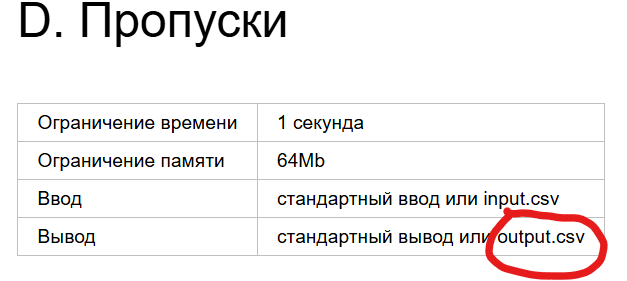

In [ ]:
df = pd.read_csv('Задача D/01.csv')

df.isnull().sum()

,0
Имя,4
Возраст,2
Балл,0


In [ ]:
df = pd.read_csv('Задача D/01.csv')

name = df['Имя'].isnull().sum()
age = df['Возраст'].isnull().sum()
point = df['Балл'].isnull().sum()

d = [{"Название_колонки": "Имя", "Количество_NaN": name},
     {"Название_колонки": "Возраст", "Количество_NaN": age},
     {"Название_колонки": "Балл", "Количество_NaN": point}]

data = pd.DataFrame(d)
data.to_csv('output.csv', index=False)

# E. Кто старше 35?

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Задача E/01.csv')

df

,Имя,Возраст,Балл
0,Виолетта,16,27
1,Амалия,8,35
2,Максим,45,30
3,Иван,23,44
4,Наталья,29,48
5,Михаил,23,14
6,Диана,42,7
7,искандер,25,27
8,Артем,49,0
9,Захар,2,8


In [ ]:
df['Возраст'] > 35

,Возраст
0,False
1,False
2,True
3,False
4,False
5,False
6,True
7,False
8,True
9,False


In [ ]:
df.loc[df['Возраст'] > 35]

,Имя,Возраст,Балл
2,Максим,45,30
6,Диана,42,7
8,Артем,49,0


In [ ]:
df.loc[df['Возраст'] > 35, 'Имя']

,Имя
2,Максим
6,Диана
8,Артем


In [ ]:
df.loc[df['Возраст'] > 35, 'Имя'].values

array(['Максим', 'Диана', 'Артем'], dtype=object)

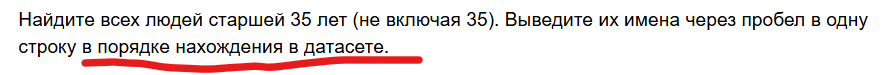

In [ ]:
names = df.loc[df['Возраст'] > 35, 'Имя'].values

# поэтому ничего не сортируем, а просто выводим
print(*names)

Максим Диана Артем


# F. Какая игра самая популярная?*

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Задача F/02.csv')

df.tail(20)

,ID,Name,Year Published,Rating Average,Complexity Average,Domains
56,42493.0,Giro D'Italia Card Game,2009.0,"5,82","1,43","Family Games, Strategy Games"
57,79131.0,Star Trek: Expeditions,2011.0,"6,48","2,41",Thematic Games
58,12211.0,Ancients II,1992.0,"6,28",2,Wargames
59,2808.0,The Russian Campaign,1974.0,"7,30","2,87",Wargames
60,150580.0,Spexxx,2013.0,"6,35","1,56","Abstract Games, Family Games"
61,85857.0,Guns of August,2011.0,"6,66","2,07",Wargames
62,230791.0,Time of Legends: Joan of Arc,2019.0,"8,24","3,48","Thematic Games, Wargames"
63,1506.0,Conquistador: The Age of Exploration,1976.0,"6,48","3,31","Strategy Games, Wargames"
64,216132.0,Clans of Caledonia,2017.0,"8,01","3,46",Strategy Games
65,218417.0,Aeon's End: War Eternal,2017.0,"8,41","2,91",Strategy Games


In [ ]:
b=df["Domains"].value_counts()

c=b.sort_values(ascending=False)

for i in range(len(c)):
  if c[i]==c[0]:
    print(f'{b.index[i]} {c[i]}')

,count
Domains,
Wargames,25
Strategy Games,11
Family Games,9
Abstract Games,8
Thematic Games,5
Party Games,4
Children's Games,4
"Family Games, Strategy Games",2
"Strategy Games, Thematic Games",2


In [ ]:
df['Domains'] = df['Domains'].str.replace(', ', ',')
tmp = df['Domains'].str.get_dummies(sep=',')
tmp

,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,1,1,0
72,0,0,0,0,0,0,0,1
73,0,0,0,0,0,0,0,1
74,1,0,0,0,0,0,0,0


In [ ]:
tmp.columns

Index(['Abstract Games', 'Children's Games', 'Customizable Games',
       'Family Games', 'Party Games', 'Strategy Games', 'Thematic Games',
       'Wargames'],
      dtype='object')

In [ ]:
df['Domains'].str.get_dummies(sep=',').sum()

,0
Abstract Games,9
Children's Games,5
Customizable Games,1
Family Games,14
Party Games,4
Strategy Games,16
Thematic Games,9
Wargames,27


In [ ]:
df['Domains'].str.get_dummies(sep=',').sum().reset_index()

,index,0
0,Abstract Games,9
1,Children's Games,5
2,Customizable Games,1
3,Family Games,14
4,Party Games,4
5,Strategy Games,16
6,Thematic Games,9
7,Wargames,27


In [ ]:
res1 = df['Domains'].str.get_dummies(sep=',').sum().reset_index()

# а дальше все точно также как в задаче B
res1.columns = ['Name', 'count']

mode_names = res1[res1['count'] == res1['count'].max()].values

# CODE FOR SORT

for h in mode_names:
    print(*h)

Family Games 2


**Как ещё можно было решить?**

In [ ]:
df['Domains'].str.split(',')

,Domains
0,[Children's Games]
1,[Family Games]
2,[Family Games]
3,[Abstract Games]
4,"[Strategy Games, Thematic Games]"


In [ ]:
df['Domains'].str.split(',', expand=True)

,0,1
0,Children's Games,None
1,Family Games,None
2,Family Games,None
3,Abstract Games,None
4,Strategy Games,Thematic Games


In [ ]:
df = pd.read_csv('Задача F/01.csv')

df['Domains'] = df['Domains'].str.split(',')

# "Взрываем" список тематик в отдельные строки, чтобы можно было подсчитать частоты
df.explode('Domains')

,ID,Name,Year Published,Rating Average,Complexity Average,Domains
0,4888.0,Don't Break the Ice,1968.0,"4,74","1,10",Children's Games
1,169341.0,Birds of a Feather,2015.0,"6,74","1,24",Family Games
2,306680.0,GOLD,2020.0,"7,01",1,Family Games
3,28861.0,Kingdom Quest,2007.0,"5,41","2,25",Abstract Games
4,186721.0,Healthy Heart Hospital,2015.0,"7,25","2,81",Strategy Games
4,186721.0,Healthy Heart Hospital,2015.0,"7,25","2,81",Thematic Games


In [ ]:
df.explode('Domains')['Domains'].value_counts()

,count
Domains,
Family Games,2
Children's Games,1
Abstract Games,1
Strategy Games,1
Thematic Games,1


# G. Средний возраст игр*

Опять же тест на внимательность:

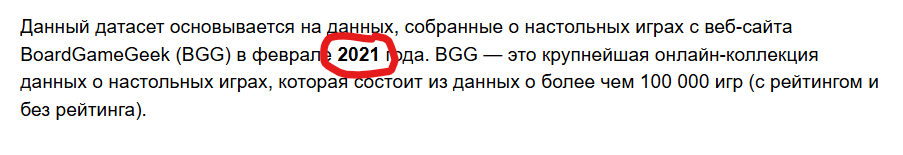

In [ ]:
df = pd.read_csv('Задача G/0.csv')
df

,ID,Name,Year Published,Rating Average,Complexity Average,Domains,Возраст
0,224031.0,Cartagena,2017.0,"6,66","1,58",Family Games,4.0
1,3720.0,Subbuteo,1947.0,"6,96","1,84","Family Games, Thematic Games",74.0
2,28699.0,Kryptonim: Lew Morski,0.0,"5,47","2,29",Wargames,2021.0
3,246873.0,"Königsberg: The Soviet Attack on East Prussia,...",2018.0,"7,98","2,44",Wargames,3.0
4,33857.0,Prince of Chaos: Battle for Tae Orn,2008.0,"6,56","4,23",Wargames,13.0
...,...,...,...,...,...,...,...
71,98.0,Axis & Allies,1981.0,"6,56","3,04",Wargames,40.0
72,142645.0,Havok & Hijinks,2014.0,"6,78","1,60",Family Games,7.0
73,250821.0,Battlestar Galactica: Starship Battles - Start...,2018.0,"8,13","3,21",Wargames,3.0
74,206915.0,Tempel des Schreckens,2016.0,"7,10","1,14",Party Games,5.0


In [ ]:
df.dtypes

,0
ID,float64
Name,object
Year Published,float64
Rating Average,object
Complexity Average,object
Domains,object
Возраст,float64


In [ ]:
# как посчитать возраст?
df['Возраст'] = 2021 - df['Year Published']
df

,ID,Name,Year Published,Rating Average,Complexity Average,Domains,Возраст
0,224031.0,Cartagena,2017.0,"6,66","1,58",Family Games,4.0
1,3720.0,Subbuteo,1947.0,"6,96","1,84","Family Games, Thematic Games",74.0
2,28699.0,Kryptonim: Lew Morski,0.0,"5,47","2,29",Wargames,2021.0
3,246873.0,"Königsberg: The Soviet Attack on East Prussia,...",2018.0,"7,98","2,44",Wargames,3.0
4,33857.0,Prince of Chaos: Battle for Tae Orn,2008.0,"6,56","4,23",Wargames,13.0
...,...,...,...,...,...,...,...
71,98.0,Axis & Allies,1981.0,"6,56","3,04",Wargames,40.0
72,142645.0,Havok & Hijinks,2014.0,"6,78","1,60",Family Games,7.0
73,250821.0,Battlestar Galactica: Starship Battles - Start...,2018.0,"8,13","3,21",Wargames,3.0
74,206915.0,Tempel des Schreckens,2016.0,"7,10","1,14",Party Games,5.0


In [ ]:
df['Возраст'].mean()

45.36842105263158

In [ ]:
ans = np.round(df['Возраст'].mean(), 2)
print(ans)

16.2


**Почему надо использовать именно функцию библиотеки `numpy` для округления?**

In [ ]:
ans = df['Возраст'].mean()

print(f'{ans:0.2f}') # Появился НЕЗНАЧАЩИЙ 0

16.20


# H. Что мы знаем о стратегиях?*

In [ ]:
df = pd.read_csv('Задача H/03.csv')

df.head(10)

,ID,Name,Year Published,Rating Average,Complexity Average,Domains
0,59959.0,Letters from Whitechapel,2011.0,"7,40","2,66","Strategy Games,Thematic Games"
1,1653.0,Coup,1991.0,"5,09","1,86",Wargames
2,38364.0,Days of Steam,2009.0,"5,99",2,Strategy Games
3,225610.0,Smolensk: Barbarossa Derailed,2018.0,"8,10",4,Wargames
4,283294.0,Yukon Airways,2019.0,"7,50","2,75",Strategy Games
5,20829.0,Keesdrow,2005.0,"6,43","1,77",Family Games
6,30024.0,Kachina,2009.0,"6,62","2,06","Family Games,Strategy Games"
7,209001.0,Monster Lands,2018.0,"7,29","3,33",Strategy Games
8,168232.0,Project Dreamscape,2015.0,"6,59","1,64",Family Games
9,39029.0,Castle Builders,2008.0,"5,82","1,43",Abstract Games


In [ ]:
import pandas as pd
import numpy
df = pd.read_csv('Задача H/03.csv')

df['Domains'] = df['Domains'].apply(lambda x: x.split(','))
print(df.shape)
df_exploded = df.explode('Domains')
df_exploded

(76, 6)


,ID,Name,Year Published,Rating Average,Complexity Average,Domains
0,59959.0,Letters from Whitechapel,2011.0,"7,40","2,66",Strategy Games
0,59959.0,Letters from Whitechapel,2011.0,"7,40","2,66",Thematic Games
1,1653.0,Coup,1991.0,"5,09","1,86",Wargames
2,38364.0,Days of Steam,2009.0,"5,99",2,Strategy Games
3,225610.0,Smolensk: Barbarossa Derailed,2018.0,"8,10",4,Wargames
...,...,...,...,...,...,...
71,244521.0,The Quacks of Quedlinburg,2018.0,"7,82","1,94",Family Games
72,6119.0,Laser Attack,1978.0,"5,99","1,17",Children's Games
73,32821.0,Battle Leader Tactics,2007.0,"6,66","2,11",Wargames
74,240980.0,Blood on the Clocktower,2020.0,"7,74","2,96",Party Games


In [ ]:
df_exploded[df_exploded['Domains'] == 'Strategy Games']

In [ ]:
# domains = df_exploded['Domains'] # &

# strategies = df[domains == 'Strategy Games']
strategies = df_exploded[df_exploded['Domains'] == 'Strategy Games']

strategies['Rating Average'] = strategies['Rating Average'].str.replace(',', '.').astype(float)
mean_rating = strategies['Rating Average'].mean()
print(numpy.round(mean_rating,2))

6.99


<ipython-input-70-135f3565e830>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strategies['Rating Average'] = strategies['Rating Average'].str.replace(',', '.').astype(float)


In [ ]:
df['Rating Average'] = df['Rating Average'].str.replace(',', '.').astype(float)

df.dtypes

,0
ID,float64
Name,object
Year Published,float64
Rating Average,float64
Complexity Average,object
Domains,object


In [ ]:
# Что делали многие?

df.loc[df['Domains'] == 'Strategy Games']

# print(round(df.loc[df['Domains'] == 'Strategy Games', 'Rating Average'].mean(), 2))

,ID,Name,Year Published,Rating Average,Complexity Average,Domains
1,154458.0,Akrotiri,2014.0,7.25,"2,66",Strategy Games
4,167791.0,Terraforming Mars,2016.0,8.43,"3,24",Strategy Games


Но вообще-то, эта игра допустим тоже относится к стратегиям:

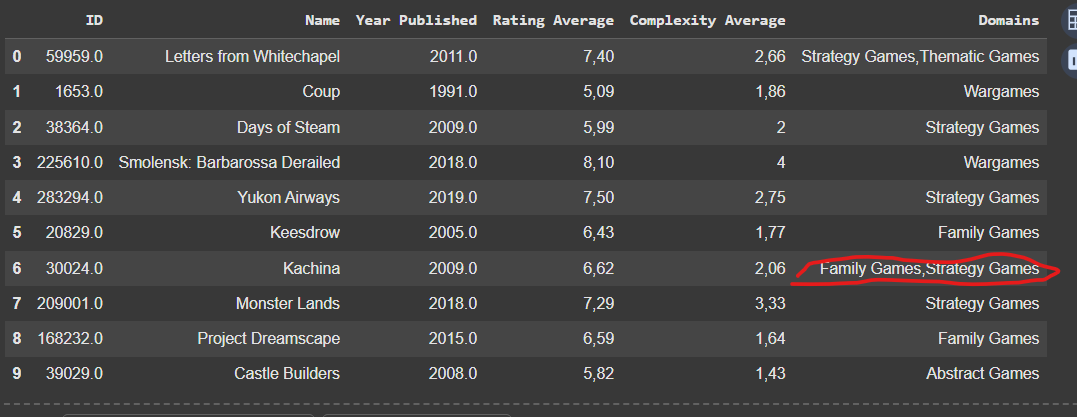

In [ ]:
# попробуем сначала решить задачу как предыдущие
res = df['Domains'].str.get_dummies(sep=',')
res

,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
71,0,0,0,1,0,0,0,0
72,0,1,0,0,0,0,0,0
73,0,0,0,0,0,0,0,1
74,0,0,0,0,1,0,0,0


In [ ]:
tmp = pd.concat([df, res], axis=1)
tmp

,ID,Name,Year Published,Rating Average,Complexity Average,Domains,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,59959.0,Letters from Whitechapel,2011.0,7.40,"2,66","Strategy Games,Thematic Games",0,0,0,0,0,1,1,0
1,1653.0,Coup,1991.0,5.09,"1,86",Wargames,0,0,0,0,0,0,0,1
2,38364.0,Days of Steam,2009.0,5.99,2,Strategy Games,0,0,0,0,0,1,0,0
3,225610.0,Smolensk: Barbarossa Derailed,2018.0,8.10,4,Wargames,0,0,0,0,0,0,0,1
4,283294.0,Yukon Airways,2019.0,7.50,"2,75",Strategy Games,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,244521.0,The Quacks of Quedlinburg,2018.0,7.82,"1,94",Family Games,0,0,0,1,0,0,0,0
72,6119.0,Laser Attack,1978.0,5.99,"1,17",Children's Games,0,1,0,0,0,0,0,0
73,32821.0,Battle Leader Tactics,2007.0,6.66,"2,11",Wargames,0,0,0,0,0,0,0,1
74,240980.0,Blood on the Clocktower,2020.0,7.74,"2,96",Party Games,0,0,0,0,1,0,0,0


In [ ]:
tmp.loc[tmp['Strategy Games']==1]

,ID,Name,Year Published,Rating Average,Complexity Average,Domains,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,59959.0,Letters from Whitechapel,2011.0,7.40,"2,66","Strategy Games,Thematic Games",0,0,0,0,0,1,1,0
2,38364.0,Days of Steam,2009.0,5.99,2,Strategy Games,0,0,0,0,0,1,0,0
4,283294.0,Yukon Airways,2019.0,7.50,"2,75",Strategy Games,0,0,0,0,0,1,0,0
6,30024.0,Kachina,2009.0,6.62,"2,06","Family Games,Strategy Games",0,0,0,1,0,1,0,0
7,209001.0,Monster Lands,2018.0,7.29,"3,33",Strategy Games,0,0,0,0,0,1,0,0
10,266810.0,Paladins of the West Kingdom,2019.0,8.07,"3,67",Strategy Games,0,0,0,0,0,1,0,0
11,176494.0,Isle of Skye: From Chieftain to King,2015.0,7.44,"2,25","Family Games,Strategy Games",0,0,0,1,0,1,0,0
12,41569.0,The Great Fire of London 1666,2010.0,6.52,"2,54",Strategy Games,0,0,0,0,0,1,0,0
14,32382.0,Gipsy King,2007.0,6.54,"1,83","Abstract Games,Strategy Games",1,0,0,0,0,1,0,0
24,220520.0,Caverna: Cave vs Cave,2017.0,7.19,"2,58",Strategy Games,0,0,0,0,0,1,0,0


In [ ]:
ans = np.round(tmp.loc[tmp['Strategy Games']==1, 'Rating Average'].mean(),2)
print(ans)

6.99


In [ ]:
'hello world'.contains('hello') - true

AttributeError: 'str' object has no attribute 'contains'

In [ ]:
# можно пойти другим путем

df = pd.read_csv('Задача H/03.csv')

df['Rating Average'] = df['Rating Average'].str.replace(',', '.').astype(float)

df['Domains'].str.contains('Strategy Games') # содержит

,Domains
0,True
1,False
2,True
3,False
4,True
...,...
71,False
72,False
73,False
74,False


In [ ]:
df[df['Domains'].str.contains('Strategy Games')]

,ID,Name,Year Published,Rating Average,Complexity Average,Domains
0,59959.0,Letters from Whitechapel,2011.0,7.40,"2,66","Strategy Games,Thematic Games"
2,38364.0,Days of Steam,2009.0,5.99,2,Strategy Games
4,283294.0,Yukon Airways,2019.0,7.50,"2,75",Strategy Games
6,30024.0,Kachina,2009.0,6.62,"2,06","Family Games,Strategy Games"
7,209001.0,Monster Lands,2018.0,7.29,"3,33",Strategy Games
10,266810.0,Paladins of the West Kingdom,2019.0,8.07,"3,67",Strategy Games
11,176494.0,Isle of Skye: From Chieftain to King,2015.0,7.44,"2,25","Family Games,Strategy Games"
12,41569.0,The Great Fire of London 1666,2010.0,6.52,"2,54",Strategy Games
14,32382.0,Gipsy King,2007.0,6.54,"1,83","Abstract Games,Strategy Games"
24,220520.0,Caverna: Cave vs Cave,2017.0,7.19,"2,58",Strategy Games


In [ ]:
ans = np.round(df.loc[df['Domains'].str.contains('Strategy Games'), 'Rating Average'].mean(),2)
print(ans)

6.99


In [ ]:
# round(a, 2)

# I. PPI***

In [ ]:
df = pd.read_csv('Задача I/03.csv')
df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight
0,576,Lenovo,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,2.02kg
1,420,Acer,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.6kg
2,454,Dell,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,2.23kg
3,904,Lenovo,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg
4,610,MSI,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,4.14kg
5,730,Lenovo,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg
6,857,Asus,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.45kg
7,359,HP,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,2.6kg
8,924,HP,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,1.09kg
9,74,Dell,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg


In [ ]:
df['ScreenResolution'].str.split()

,ScreenResolution
0,[1366x768]
1,"[IPS, Panel, Full, HD, /, Touchscreen, 1920x1080]"
2,"[Full, HD, 1920x1080]"
3,"[IPS, Panel, Full, HD, 1920x1080]"
4,"[Full, HD, 1920x1080]"
5,"[IPS, Panel, Full, HD, 1920x1080]"
6,"[IPS, Panel, Full, HD, 1920x1080]"
7,"[Full, HD, 1920x1080]"
8,"[4K, Ultra, HD, /, Touchscreen, 3840x2160]"
9,"[Full, HD, 1920x1080]"


In [ ]:
df['ScreenResolution'].str.split(expand=True)

,0,1,2,3,4,5,6
0,1366x768,None,None,None,None,None,None
1,IPS,Panel,Full,HD,/,Touchscreen,1920x1080
2,Full,HD,1920x1080,None,None,None,None
3,IPS,Panel,Full,HD,1920x1080,None,None
4,Full,HD,1920x1080,None,None,None,None
5,IPS,Panel,Full,HD,1920x1080,None,None
6,IPS,Panel,Full,HD,1920x1080,None,None
7,Full,HD,1920x1080,None,None,None,None
8,4K,Ultra,HD,/,Touchscreen,3840x2160,None
9,Full,HD,1920x1080,None,None,None,None


In [ ]:
# основная сложность состоит в том, чтобы извлечь само расширение экрана
# как это сделать?

df['ScreenResolution'].str.extract(r'(\d+x\d+)')

,0
0,1366x768
1,1920x1080
2,1920x1080
3,1920x1080
4,1920x1080
5,1920x1080
6,1920x1080
7,1920x1080
8,3840x2160
9,1920x1080


In [ ]:
import re

def get_formatted_screen(text):
    result = re.findall(r'[0-9]*[x][0-9]*', text)
    return result[0]

df['ScreenResolution'].map(get_formatted_screen)

,ScreenResolution
0,1366x768
1,1920x1080
2,1920x1080
3,1920x1080
4,1920x1080
5,1920x1080
6,1920x1080
7,1920x1080
8,3840x2160
9,1920x1080


In [ ]:
import re

df['ScreenResolution'].apply(lambda x: re.findall(r'[0-9]*[x][0-9]*', x)[0])

,ScreenResolution
0,1366x768
1,1920x1080
2,1920x1080
3,1920x1080
4,1920x1080
5,1920x1080
6,1920x1080
7,1920x1080
8,3840x2160
9,1920x1080


In [ ]:
df['ScreenResolution'] = df['ScreenResolution'].apply(lambda x: re.findall(r'[0-9]*[x][0-9]*', x)[0])
df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight
0,576,Lenovo,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,2.02kg
1,420,Acer,13.3,1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.6kg
2,454,Dell,15.6,1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,2.23kg
3,904,Lenovo,14.0,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg
4,610,MSI,17.3,1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,4.14kg
5,730,Lenovo,14.0,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg
6,857,Asus,13.3,1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.45kg
7,359,HP,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,2.6kg
8,924,HP,12.5,3840x2160,Intel Core M 6Y75 1.2GHz,8GB,1.09kg
9,74,Dell,15.6,1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg


In [ ]:
df['ScreenResolution'].str.split('x', expand=True)

,0,1
0,1366,768
1,1920,1080
2,1920,1080
3,1920,1080
4,1920,1080
5,1920,1080
6,1920,1080
7,1920,1080
8,3840,2160
9,1920,1080


In [ ]:
df['res_width'] = df['ScreenResolution'].str.split('x', expand=True)[0].astype('int64')
df['res_hight'] = df['ScreenResolution'].str.split('x', expand=True)[1].astype('int64')

df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight,res_width,res_hight
0,576,Lenovo,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,2.02kg,1366,768
1,420,Acer,13.3,1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.6kg,1920,1080
2,454,Dell,15.6,1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,2.23kg,1920,1080
3,904,Lenovo,14.0,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg,1920,1080
4,610,MSI,17.3,1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,4.14kg,1920,1080
5,730,Lenovo,14.0,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg,1920,1080
6,857,Asus,13.3,1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.45kg,1920,1080
7,359,HP,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,2.6kg,1920,1080
8,924,HP,12.5,3840x2160,Intel Core M 6Y75 1.2GHz,8GB,1.09kg,3840,2160
9,74,Dell,15.6,1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg,1920,1080


In [ ]:
df['ppi'] = np.sqrt(df['res_width']**2 + df['res_hight']**2)/df['Inches']

df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight,res_width,res_hight,ppi
0,576,Lenovo,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,2.02kg,1366,768,111.935204
1,420,Acer,13.3,1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.6kg,1920,1080,165.632118
2,454,Dell,15.6,1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,2.23kg,1920,1080,141.211998
3,904,Lenovo,14.0,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg,1920,1080,157.350512
4,610,MSI,17.3,1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,4.14kg,1920,1080,127.335675
5,730,Lenovo,14.0,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg,1920,1080,157.350512
6,857,Asus,13.3,1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.45kg,1920,1080,165.632118
7,359,HP,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,2.6kg,1920,1080,141.211998
8,924,HP,12.5,3840x2160,Intel Core M 6Y75 1.2GHz,8GB,1.09kg,3840,2160,352.465147
9,74,Dell,15.6,1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg,1920,1080,141.211998


In [ ]:
ans = df['ppi'].mean().round(2)
print(ans)

171.41


In [ ]:
import pandas as pd
import re
import numpy as np
import re

df['ScreenResolution'].apply(lambda x: re.findall(r'[0-9]*[x][0-9]*', x)[0])

df = pd.read_csv('Задача I/01.csv')

inch = np.array(df['Inches'])
lst_diag = []

# for index, values in df['ScreenResolution'].items():
#     lst_diag.append(re.search(r'\d{3,4}x\d{3,4}', values)[0])

df['ScreenResolution'] = df['ScreenResolution'].apply(lambda x: re.search(r'\d{3,4}x\d{3,4}', x)[0])

df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight
0,343,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.84kg
1,695,Dell,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,2.2kg
2,315,Lenovo,13.3,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.1kg
3,1017,HP,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1.64kg
4,74,Dell,15.6,1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg


In [ ]:
df['ppi'] = 0

df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight,ppi
0,343,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.84kg,0
1,695,Dell,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,2.2kg,0
2,315,Lenovo,13.3,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.1kg,0
3,1017,HP,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1.64kg,0
4,74,Dell,15.6,1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg,0


In [ ]:
df['col']**2

In [ ]:
for i in range(len(lst_diag)):
    lst_diag[i] = lst_diag[i].replace('x', ' ').split() # 1
    lst_diag[i][0], lst_diag[i][1] = int(lst_diag[i][0]), int(lst_diag[i][1])
    res[i] = ((lst_diag[i][0] ** 2 + lst_diag[i][1] ** 2) ** (1 / 2) / inch[i])


print(round(res.mean(), 2))

# Давайте разберем типичные ошибки в контесте

Во-первых, умоляю, не пишите такие коды!

Тем более через два цикла, мы Pandas и всего его методы специально и проходим, чтобы уменьшить использование циклов!

Тем более что этот код неправильный, а дебажить его одно мучение.

In [ ]:
import pandas as pd
import math
df = pd.read_csv('input.csv', delimiter=',')

pixels = df['ScreenResolution']
pixels_ = df['ScreenResolution']
inches = df['Inches']

# во-первых так циклы не пишут в датафреймах!
for i in range(len(df)):
    for s in pixels.iloc[i]:
        if (not s.isdigit() and s != 'x'):
            pixels.iloc[i] = pixels.iloc[i].replace(s, '')
    pixels.iloc[i] = pixels.iloc[i].replace('x', ' ')
    arr = pixels.iloc[i].split()
    pixels_.iloc[i] = math.sqrt( int(arr[0]) * int(arr[0]) + int(arr[1]) * int(arr[1]) )

ppi = df['Inches']
for i in range (len(df)):
    ppi.iloc[i] = pixels_.iloc[i] / inches.iloc[i]

print(round((ppi.sum() / len(df)), 2) )

In [ ]:
# даже если вы хотите решить что-то с циклом, делаете это хотя бы правильно
df = pd.read_csv('Задача I/01.csv')

for index, row in df.iterrows():
    print(row)

laptop_ID                                  343
Company                                     HP
Inches                                    15.6
ScreenResolution             Full HD 1920x1080
Cpu                 Intel Core i5 7200U 2.5GHz
Ram                                        8GB
Weight                                  1.84kg
Name: 0, dtype: object
laptop_ID                                695
Company                                 Dell
Inches                                  15.6
ScreenResolution                    1366x768
Cpu                 Intel Core i3 6006U 2GHz
Ram                                      4GB
Weight                                 2.2kg
Name: 1, dtype: object
laptop_ID                                   315
Company                                  Lenovo
Inches                                     13.3
ScreenResolution    IPS Panel Full HD 1920x1080
Cpu                  Intel Core i5 7200U 2.5GHz
Ram                                         8GB
Weight                

In [ ]:
# даже если вы хотите решить что-то с циклом, делаете это хотя бы правильно
df = pd.read_csv('Задача I/01.csv')

# for i in range(len(df)):
#     for s in pixels.iloc[i]:
#         if (not s.isdigit() and s != 'x'):
#             pixels.iloc[i] = pixels.iloc[i].replace(s, '')
#     pixels.iloc[i] = pixels.iloc[i].replace('x', ' ')
#     arr = pixels.iloc[i].split()
#     pixels_.iloc[i] = math.sqrt( int(arr[0]) * int(arr[0]) + int(arr[1]) * int(arr[1]) )

# эту дичь можно переписать хотя бы так:
for index, row in df.iterrows():
    print(row['ScreenResolution'])
    for s in row['ScreenResolution']:
        if (not row['ScreenResolution'].isdigit() and s != 'x'):
            df.loc[index, 'ScreenResolution'] = df.loc[index, 'ScreenResolution'].replace(s, '')
            # все не буду переписывать - это мучение

Full HD 1920x1080
1366x768
IPS Panel Full HD 1920x1080
1366x768
Full HD 1920x1080


In [ ]:
# еще одно неверное решение задачи I

import pandas as pd
import math
import re

# Чтение данных из CSV файла
df = pd.read_csv('input.csv')

# Функция для расчета PPI
def calculate_ppi(resolution, inches):
    # Используем регулярное выражение для извлечения ширины и высоты
    match = re.search(r'(\d+)\s*x\s*(\d+)', resolution)
    if match:
        width, height = map(int, match.groups())
        # Вычисляем диагональное разрешение
        diagonal_resolution = math.sqrt(width**2 + height**2)
        # Рассчитываем PPI
        ppi = diagonal_resolution / inches
        return ppi
    else:
        # Если формат разрешения некорректен, возвращаем None
        return None

# Список для хранения PPI
ppi_values = []

# Проходим по каждой строке DataFrame
for index, row in df.iterrows():
    inches = row['Inches']
    resolution = row['ScreenResolution']

    # Рассчитываем PPI и добавляем в список, если PPI не None
    ppi = calculate_ppi(resolution, inches)
    if ppi is not None:
        ppi_values.append(ppi)

# Вычисляем среднее значение PPI, если есть валидные значения
if ppi_values:
    average_ppi = sum(ppi_values) / len(ppi_values)
else:
    average_ppi = 0  # Если нет валидных значений, устанавливаем 0

# Вывод результата, округленного до 1 знака после запятой
with open('output.txt', 'w') as f:
    f.write(f"{average_ppi:.1f}\n")

In [ ]:
# еще одно неверное решение

df = pd.read_csv('Задача I/03.csv')

df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight
0,576,Lenovo,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,2.02kg
1,420,Acer,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.6kg
2,454,Dell,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,2.23kg
3,904,Lenovo,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg
4,610,MSI,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,4.14kg
5,730,Lenovo,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg
6,857,Asus,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.45kg
7,359,HP,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,2.6kg
8,924,HP,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,1.09kg
9,74,Dell,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg


In [ ]:
df[['width', 'height']] = df['ScreenResolution'].replace('[^0-9x0-9]', '', regex=True).str.split('x', expand=True).astype(int)

df

,laptop_ID,Company,Inches,ScreenResolution,Cpu,Ram,Weight,width,height
0,576,Lenovo,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,2.02kg,1366,768
1,420,Acer,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.6kg,1920,1080
2,454,Dell,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,2.23kg,1920,1080
3,904,Lenovo,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg,1920,1080
4,610,MSI,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,4.14kg,1920,1080
5,730,Lenovo,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1.32kg,1920,1080
6,857,Asus,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.45kg,1920,1080
7,359,HP,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,2.6kg,1920,1080
8,924,HP,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,1.09kg,43840,2160
9,74,Dell,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,2.2kg,1920,1080


In [ ]:
'hdhdh 43'.replace('', '')

'hdhdh 43'

In [ ]:
df['ScreenResolution'].str.replace()

In [ ]:
import pandas as pd

df = pd.read_csv('Задача F/01.csv')
df1 = df.Domains.str.split(',')
type(df1)

pandas.core.series.Series

In [ ]:
df1 = df1.explode('Domains').dropna(how='any')

df1

,Domains
0,Children's Games
1,Family Games
2,Family Games
3,Abstract Games
4,Strategy Games
5,Thematic Games


In [ ]:
domain_counts = df1.value_counts()
domain_counts

,count
Domains,
Family Games,2
Children's Games,1
Abstract Games,1
Strategy Games,1
Thematic Games,1


In [ ]:
max_count = domain_counts.max()
most_common_domains = domain_counts[domain_counts == max_count]

most_common_domains

,count
Domains,
Family Games,2


In [ ]:
for domain, max_count in most_common_domains.items():
    print(f"{domain} {max_count}")

Family Games 2
